# Methods

This section introduces and characterizes the methods included in this project. 

## Overview

In this section, each method is examined independently, and applied to simulated data, to evaluate it's performance across plausible parameter variations.

Where possible, simulation testing includes estimating the accuracy of each method. For example, the accuracy of methods that estimate 1/f exponents can be evaluated on data simulated to have particular characteristics, and the same can be done for measures that have analytical solutions for expected values on certain kinds of data. In other cases, the analytically expected results are unknown, in which case the simulations are used to characterize how the measures relate to variations across parameters of the simulated data. 

## Contents

Methods that are included in this project:

- `11-SpectralFitting`: measuring aperiodic parameters by fitting the power spectrum
    - methods: line fitting, robust line fitting, spectral parameterization
- `12-IRASA`: the irregular resampling and auto-spectral analysis algorithm
    - methods: IRASA
- `13-AutoCorrelation`: auto-correlation measures
    - methods: auto correlation
- `14-Fluctuations`: includes the Hurst exponent and 
    - methods: Hurst exponent, detrended fluctuation analysis (DFA)
- `15-Complexity`: time series complexity measures
    - methods: Hjorth parameters, Lyupanov exponent
- `16-Fractal`: time series fractal dimension measures
    - methods: Higuchi fractal dimension, Katz fractal dimension, Petrosian fractal dimension, Sevcik fractal dimension
- `17-Information`: information theory / entropy measures
    - approximate entropy, sample entropy, permutation entropy, weighted permutation entropy
- `18-MultiscaleEntropy`: multiscale information theory / entropy measures
    - multiscale approximate entropy, multiscale sample entropy, multiscale permutation entropy, multiscale weighted permutation entropy

## Simulations

In this section, we will use simulated data to characterize methods. 

### Aperiodic Variations

Calculate measures on simulated signals, across variations of aperiodic parameters.

Parameter sweeps include:
- variation of aperiodic exponent of powerlaw signals
- variation of aperiodic exponent of powerlaw signals with an oscillation present

### Periodic Variations

Calculate measures on simulated combined signals, with an oscillation and powerlaw components, across variations of oscillatory parameters.

Parameter sweeps include:
- variation of oscillation frequency
- variation of oscillation power

## Code Approach

Here, we will briefly introduce the general strategy and code used to run the simulations. 

### run_sims

The overarching function used to run simulations in this section is `run_sims`. 

This approach allows for:
- defining a procedure to simulate time series
- defining a measure of interest to apply to the simulated time series
- applying this measure across simulated instances, sweeping across parameter ranges

In [1]:
%matplotlib inline

import numpy as np

from neurodsp.sim import sim_powerlaw

In [2]:
# Import the `run_sims` function from the custom code folder
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.run import run_sims
from apm.plts import plot_lines
from apm.sim.settings import SIM_PARAMS_AP

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/plts/data.py:7: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.utils import trim_spectrum


In [3]:
# Check the documentation for `run_sims`
print(run_sims.__doc__)

Compute a measure of interest across a set of simulations.

    Parameters
    ----------
    sim_func : callable
        A function to create the simulations from.
    sim_params : dict
        Input arguments for `sim_func`.
    measure_func : callable
        A measure function to apply to the simulated data.
    measure_params : dict
        Input arguments for `measure_func`.
    update : {'update_exp', 'update_freq', 'update_pow', 'update_comb_exp'} or callable
        Specifies which parameter to update in simulation parameters.
    values : list or 1d array
        A parameter to step across and re-run measure calculations for.
    n_sims : int, optional, default: 10
        The number of iterations to simulate and calculate measures, per value.
    avg_func : callable, optional, default: np.mean
        The function to calculate the average for a particular parameter value.
    var_func : callable, optional
        The function to calculate the variability for a particular par

Next, we can run an example of using `run_sims`.

To do so, we will define an example analysis to apply a measure of interest (here, variance) across some simulations of 1/f (powerlaw) data.

In [4]:
# Define settings for simulation
exponents = [1, 1.5, 2]
n_sims = 2

In [5]:
# Check the predefined default settings for the simulation
SIM_PARAMS_AP

{'n_seconds': 30, 'fs': 500, 'f_range': (0.5, None)}

In [6]:
# Run simulations across different aperiodic exponents
out, var = run_sims(sim_powerlaw, SIM_PARAMS_AP, np.mean, {}, 
                    'update_exp', exponents, n_sims, var_func=np.std)

### Evaluating Results

After computing the measures, we can examine the results, across different simulation parameters.

Where possible, we also evaluate the accuracy of the computed measures given the expected answer based on the simulated parameters.

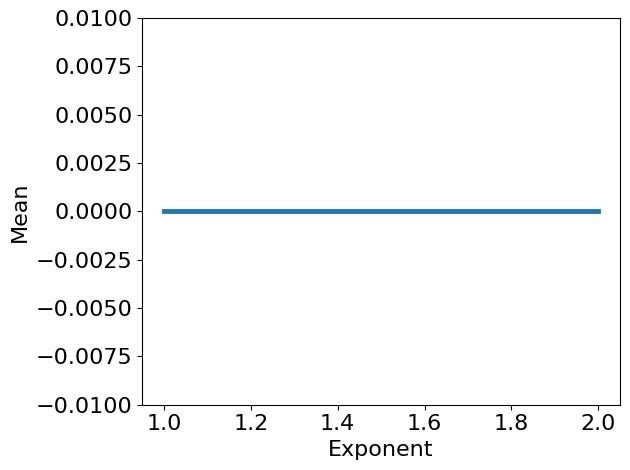

In [7]:
# Plot the computed measures across the different simulation parameters
plot_lines(exponents, out, var, ylim=[-0.01, 0.01],
           xlabel='Exponent', ylabel='Mean')

Note that in our example case, computing the signal mean, the simulated signals are normalized such that they all have a mean of 0. 